In [ ]:
'''
    Thompson Sampling -->
    
    Thompson Sampling is a popular reinforcement learning and
    decision-making algorithm used for solving the multi-armed
    bandit problem. It is designed to balance the trade-off between
    exploration (trying new options to gain more information) and
    exploitation (choosing the option that currently seems best).
'''

In [ ]:
'''
    How Thompson Sampling Works -->
    
    Thompson Sampling uses a probabilistic approach to determine which
    arm to pull at each step. It models the uncertainty of rewards
    using a prior distribution and updates this distribution based on
    observed outcomes (Bayesian updating).

    Assume Prior Distributions :
    Initially, assume a prior distribution (e.g., Beta distribution for
    Bernoulli rewards) for each arm's probability of reward.

    Sampling :
    For each arm, sample a value from its posterior distribution.
    The posterior combines prior beliefs with the data observed so far.

    Select Arm:
    Choose the arm with the highest sampled value (argmax of samples).

    Observe Reward:
    Pull the chosen arm, observe the reward, and update the posterior
    distribution for that arm.

    Repeat:
    Continue this process, balancing exploration and exploitation
    automatically as the posterior distributions converge.
'''

<img src='Source/TS.png' alt ='Thompson Sampling' style="width:500px; height:auto; margin-left:40px;">

In [ ]:
'''
    Key Advantages -->
    
    Efficient Balance: Thompson Sampling inherently balances
    exploration and exploitation.
    Bayesian Approach: Uses probabilistic reasoning to model uncertainty.
    Adaptable: Works with various reward distributions.

    Applications -->
    
    Online Advertising: Optimizing click-through rates by choosing
    which ad to display.
    Recommendation Systems: Deciding which products to recommend to users.
    Clinical Trials: Testing new drugs or treatments.
'''

In [4]:
#   Importing Libraries -->

import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [5]:
#   Importing Dataset -->

data = pd.read_csv('Data/Ads_CTR_Optimisation.csv')
data.head(10)

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
5,1,1,0,0,0,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0
7,1,1,0,0,1,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0
9,0,0,1,0,0,0,0,0,0,0


In [8]:
#   Implementing Thompson Sampling -->

num_users = 10000
num_ads = 10
ads_selected = []
num_rewards_1 = [0] * num_ads
num_rewards_0 = [0] * num_ads
total_reward = 0

for rounds in range(0, num_users):
    ad = 0
    max_random = 0
    
    for ads in range(0, num_ads):
        random_beta = random.betavariate(num_rewards_1[ads] + 1, num_rewards_0[ads] + 1)
        
        if (random_beta > max_random):
            max_random = random_beta
            ad = ads
    
    ads_selected.append(ad)
    reward = data.values[rounds, ad]
    
    if (reward == 1):
        num_rewards_1[ad] += 1
        
    else:
        num_rewards_0[ad] += 1
        
    total_reward += reward

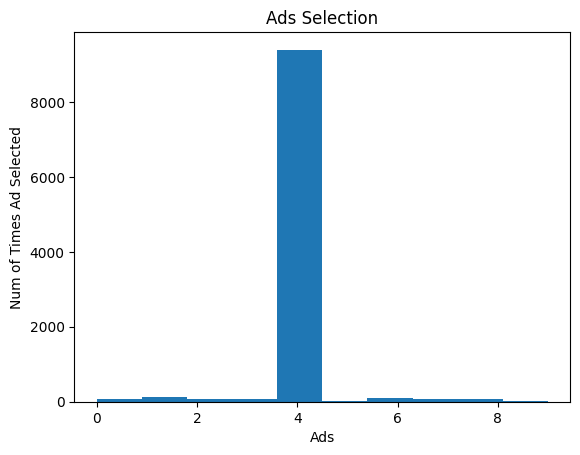

In [9]:
#   Visualzing The Results -->

plt.hist(ads_selected)
plt.title('Ads Selection')
plt.xlabel('Ads')
plt.ylabel('Num of Times Ad Selected')
plt.show()

In [10]:
#   Let's Try It With 1000 Rounds -->

num_users = 1000
num_ads = 10
ads_selected = []
num_rewards_1 = [0] * num_ads
num_rewards_0 = [0] * num_ads
total_reward = 0

for rounds in range(0, num_users):
    ad = 0
    max_random = 0
    
    for ads in range(0, num_ads):
        random_beta = random.betavariate(num_rewards_1[ads] + 1, num_rewards_0[ads] + 1)
        
        if (random_beta > max_random):
            max_random = random_beta
            ad = ads
    
    ads_selected.append(ad)
    reward = data.values[rounds, ad]
    
    if (reward == 1):
        num_rewards_1[ad] += 1
        
    else:
        num_rewards_0[ad] += 1
        
    total_reward += reward

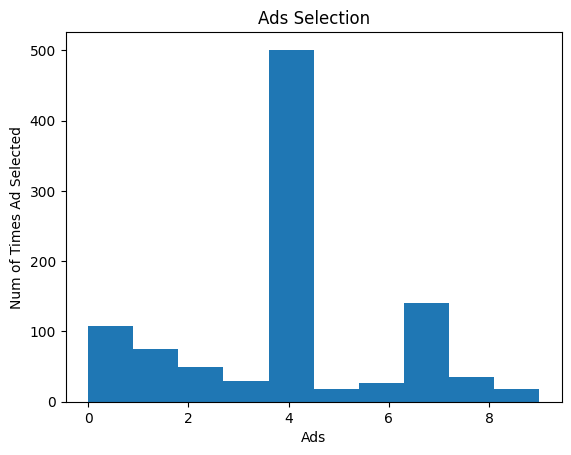

In [11]:
#   Visualzing The Results -->

plt.hist(ads_selected)
plt.title('Ads Selection')
plt.xlabel('Ads')
plt.ylabel('Num of Times Ad Selected')
plt.show()

In [15]:
#   Let's Try It With 500 Rounds -->

num_users = 200
num_ads = 10
ads_selected = []
num_rewards_1 = [0] * num_ads
num_rewards_0 = [0] * num_ads
total_reward = 0

for rounds in range(0, num_users):
    ad = 0
    max_random = 0
    
    for ads in range(0, num_ads):
        random_beta = random.betavariate(num_rewards_1[ads] + 1, num_rewards_0[ads] + 1)
        
        if (random_beta > max_random):
            max_random = random_beta
            ad = ads
    
    ads_selected.append(ad)
    reward = data.values[rounds, ad]
    
    if (reward == 1):
        num_rewards_1[ad] += 1
        
    else:
        num_rewards_0[ad] += 1
        
    total_reward += reward

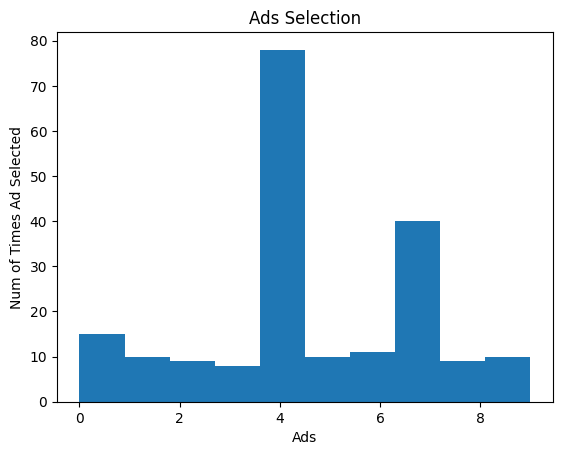

In [16]:
#   Visualzing The Results -->

plt.hist(ads_selected)
plt.title('Ads Selection')
plt.xlabel('Ads')
plt.ylabel('Num of Times Ad Selected')
plt.show()

In [ ]:
'''
    Thompson Sampling is Efficient as it is able to identify
    the most selected ad in just around 200 rounds while UCB
    was unable to identify in around 500 rounds.
'''